In [1]:
from nn import NeuralNetwork
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Autoencoder of digits dataset


Read in the data

In [2]:
digits = datasets.load_digits().data

Normalize the data using min/max scaling

In [3]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(digits)


Split into train and validation sets

In [4]:
X_train, X_val= train_test_split(norm_data, test_size=0.2, random_state=42)

In [5]:
len(X_train)

1437

Define nn architecture as 64 -> 16 -> 64, with ReLU as activations, using "MSE" as our loss metric. The model performed best with a learning rate of 0.01, and loss continued to decrease so I set it to 10k epochs, when it started to plateu. I chose a batch size of 32, which is smaller (not too small) and also allowed the model to perform well.

In [10]:
nn_arch = [
        {"input_dim": 64, "output_dim": 16, "activation": "relu"},
        {"input_dim": 16, "output_dim": 64, "activation": "relu"}
    ]

model = NeuralNetwork(nn_arch, lr=0.01, seed=42, batch_size=32, epochs=10000, loss_function="mse")

### Training the model

In [11]:
digits.shape

(1797, 64)

In [12]:
loss_train, loss_val = model.fit(X_train, X_train, X_val, X_val);

Epoch 1/10000 - Train Loss: 0.208460 - Val Loss: 0.202880
Epoch 2/10000 - Train Loss: 0.203052 - Val Loss: 0.197109
Epoch 3/10000 - Train Loss: 0.196856 - Val Loss: 0.190562
Epoch 4/10000 - Train Loss: 0.189986 - Val Loss: 0.183430
Epoch 5/10000 - Train Loss: 0.182622 - Val Loss: 0.176059
Epoch 6/10000 - Train Loss: 0.175192 - Val Loss: 0.168734
Epoch 7/10000 - Train Loss: 0.167870 - Val Loss: 0.161699
Epoch 8/10000 - Train Loss: 0.160891 - Val Loss: 0.155020
Epoch 9/10000 - Train Loss: 0.154301 - Val Loss: 0.148780
Epoch 10/10000 - Train Loss: 0.148170 - Val Loss: 0.142999
Epoch 11/10000 - Train Loss: 0.142464 - Val Loss: 0.137656
Epoch 12/10000 - Train Loss: 0.137229 - Val Loss: 0.132814
Epoch 13/10000 - Train Loss: 0.132548 - Val Loss: 0.128548
Epoch 14/10000 - Train Loss: 0.128505 - Val Loss: 0.124936
Epoch 15/10000 - Train Loss: 0.125111 - Val Loss: 0.121941
Epoch 16/10000 - Train Loss: 0.122298 - Val Loss: 0.119474
Epoch 17/10000 - Train Loss: 0.119970 - Val Loss: 0.117432
Epoch 

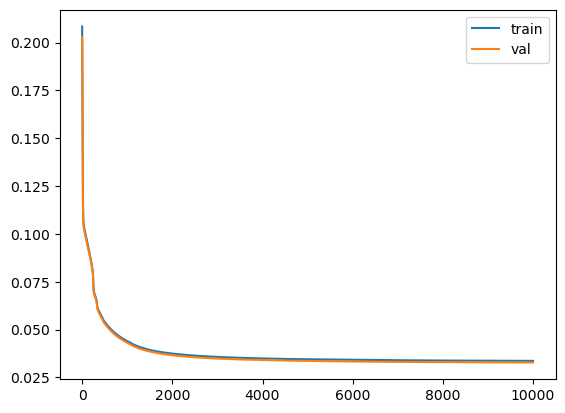

In [13]:
plt.plot(loss_train, label="train")
plt.plot(loss_val, label="val")

plt.legend()
plt.show()

In [14]:
print(f"Average reconstruction error over the validation set : {loss_val[-1]} ")

Average reconstruction error over the validation set : 0.03280386718925947 


The validation and train losses are close together. I could train until the validation loss gets smaller but it seems that even after 10k epochs, both are still decreasing. I think the model is performing and training quite well.